## Import modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [ ]:
# load data
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Google Drive file ids
files_id = {
    "products": "1NMtjHVrg_RvXur_EEpTtr8OBueQC9RfM",
    "orders": "1NJBIyTnSthIFFqNsg2KWqJjsNgc_RwRs",
    "orderlines": "1NNgoAOYssJKfsvVoKO_Fs_BtB70ybAMs", 
    "brands": "1N8j2FfbxBdTqw4qnFfIV74GXrLIeavil",
}

# Read data from Google Drive
products = pd.read_csv(gd_path(files_id["products"]), sep=",")
orders = pd.read_csv(gd_path(files_id["orders"]), sep=",")
orderlines = pd.read_csv(gd_path(files_id["orderlines"]), sep=",")
brands = pd.read_csv(gd_path(files_id["brands"]), sep=",")

In [ ]:
# Change dates to datetime format
orders["created_date"] = pd.to_datetime(orders["created_date"])
orderlines["date"] = pd.to_datetime(orderlines["date"])

## Create a merged table holding information about discounts

In [ ]:
# Merge orderlines and products data frames
discounts = orderlines.merge(products, how='left', on='sku')

# Absolute discounts (in €)
discounts["discount_abs"] = discounts.price - discounts.unit_price

# Relative discounts (in %)
discounts["discount_rel"] = round(discounts.discount_abs/discounts.price*100,2)

# Discounted: Yes or no
discounts["discounted"] = 0
discounts.loc[discounts.discount_abs > 0.05, "discounted"] = 1

# Discount categories
discounts["disc_category"] = pd.cut(discounts.discount_rel, range(0,101,10), labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"])
# Add 0% discount category
discounts["disc_category"] = discounts["disc_category"].astype("str")
discounts.loc[discounts.discounted == 0, "disc_category"] = "0%"

# Brand
discounts["brand"] = discounts["sku"].str[:3]

## Group data into discount categories

In [ ]:
## Group by discount categories
disc_cat = discounts.groupby("disc_category").agg({'sku':'nunique', 'unit_price_total':'sum'}).reset_index()
disc_cat = disc_cat.rename(columns={"sku":"n_products", "unit_price_total":"total_revenue"})

# Normalize by the number of unique products in each discount category
# --> The normalized revenue indicates the average total revenue of products 
# within a certain discount category (i.e. averaged across unique products (sku)
# within a category)
disc_cat["norm_revenue"] = disc_cat['total_revenue']/disc_cat["n_products"]


# Start analysis

### Pie chart of Sales and Revenue by product category (Pia) 

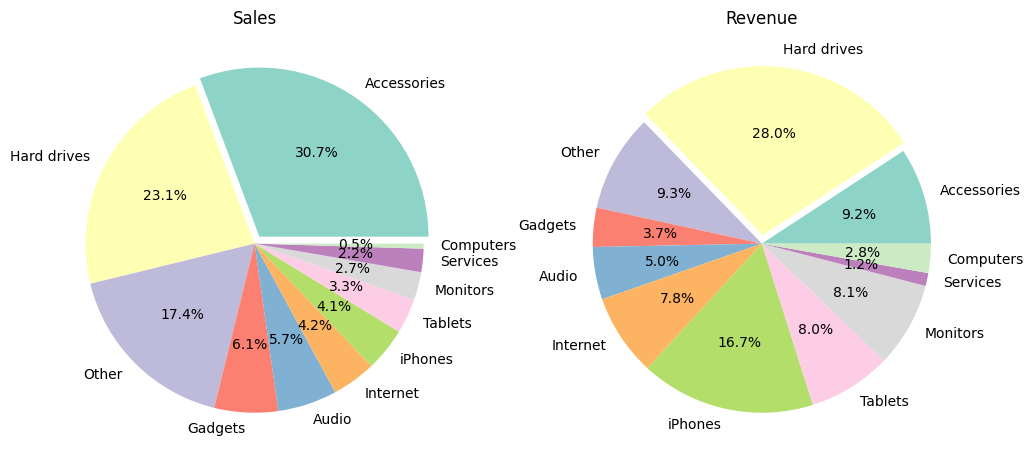

In [ ]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')

# Declare data 
cats = discounts.groupby(["category"]).agg({'id':'count', "unit_price_total":"sum"}).sort_values(by="id", ascending=False).reset_index()
data1 = cats["id"]
data2 = cats["unit_price_total"]
keys = cats["category"]

# Highlight max slice
explode1 = [0]*len(data1)
explode1[data1.idxmax()] = 0.05
explode2 = [0]*len(data2)
explode2[data2.idxmax()] = 0.05

# Plot data on charts
ax[0].pie(data1, labels=keys, colors=palette_color, explode=explode1, autopct='%.1f%%') # By count
ax[1].pie(data2, labels=keys, colors=palette_color, explode=explode2, autopct='%.1f%%') # By revenue

# Add titles
ax[0].title.set_text("Sales")
ax[1].title.set_text("Revenue")
  
# Show chart
plt.show()


### Pie chart of Sales and Revenue by Product Category - Most important categories only

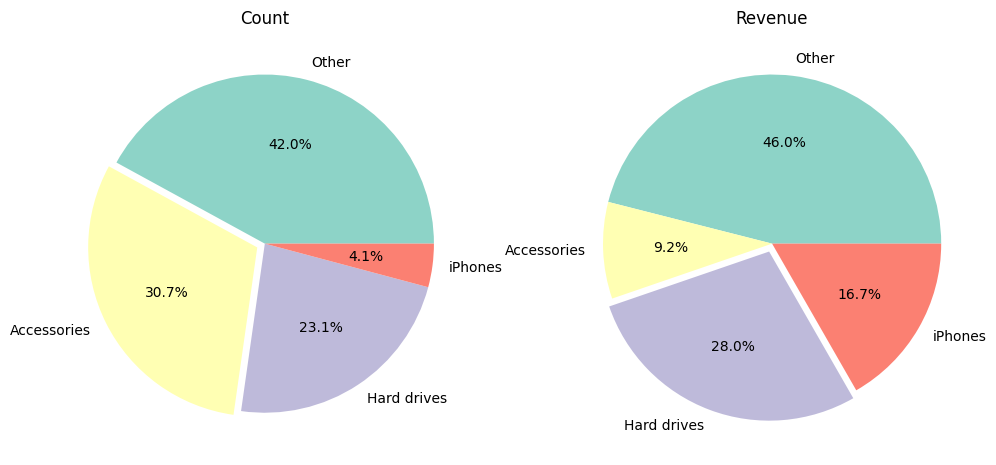

In [ ]:
# Move smaller categories to "Other"
use_data = discounts.copy()
use_data.loc[~use_data.category.isin(["Accessories", "Hard drives", "iPhones"]),"category"] = "Other"
use_data.category.value_counts()

# Group by categories
cats = use_data.groupby(["category"]).agg({'id':'count', "unit_price_total":"sum"}).sort_values(by="id", ascending=False).reset_index()

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')

# Declare data 
data1 = cats["id"]
data2 = cats["unit_price_total"]
keys = cats["category"]

# Highlight max slice
# explode1 = [0]*len(data1)
# explode1[data1.idxmax()] = 0.05
# explode2 = [0]*len(data2)
# explode2[data2.idxmax()] = 0.05
explode1 = [0, 0.05, 0, 0]
explode2 = [0, 0, 0.05, 0]

# Plot data on charts
ax[0].pie(data1, labels=keys, colors=palette_color, explode=explode1, autopct='%.1f%%') # By count
ax[1].pie(data2, labels=keys, colors=palette_color, explode=explode2, autopct='%.1f%%') # By revenue

# Add titles
ax[0].title.set_text("Count")
ax[1].title.set_text("Revenue")
  
# Show chart
plt.show()

### Pie chart of sales and revenue by price category

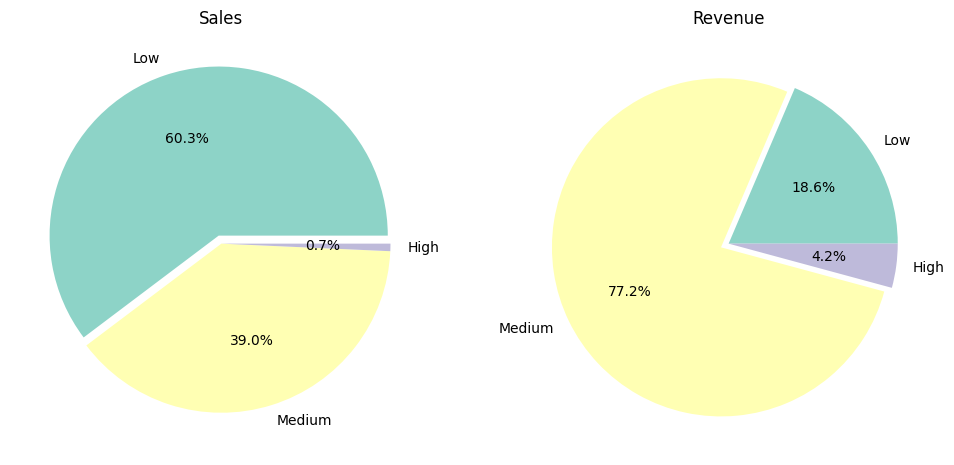

In [ ]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')

# Declare data 
cats = discounts.groupby(["price category"]).agg({'id':'count', "unit_price_total":"sum"}).sort_values(by="id", ascending=False).reset_index()
data1 = cats["id"]
data2 = cats["unit_price_total"]
keys = cats["price category"]

# Highlight max slice
explode1 = [0]*len(data1)
explode1[data1.idxmax()] = 0.05
explode2 = [0]*len(data2)
explode2[data2.idxmax()] = 0.05

# Plot data on charts
ax[0].pie(data1, labels=keys, colors=palette_color, explode=explode1, autopct='%.1f%%') # By count
ax[1].pie(data2, labels=keys, colors=palette_color, explode=explode2, autopct='%.1f%%') # By revenue

# Add titles
ax[0].title.set_text("Sales")
ax[1].title.set_text("Revenue")
  
# Show chart
plt.show()


### Plot revenue by discount categories (Pia)

Text(0.5, 1.0, 'Hard drives')

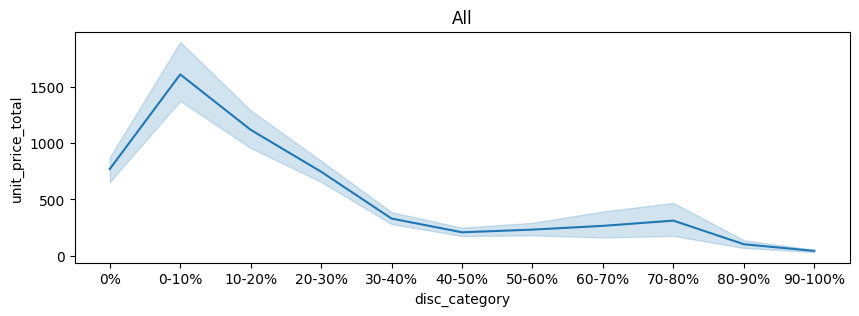

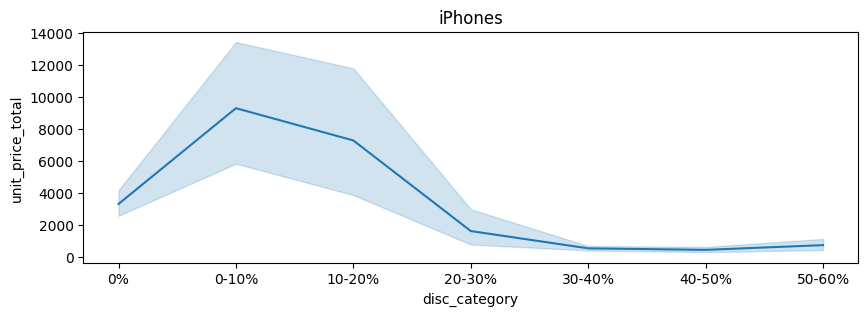

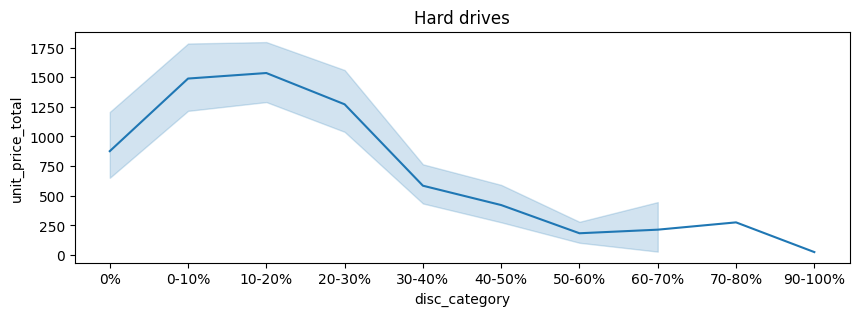

In [ ]:
# Group by sku and discount category (one sku can have different disc_categories at different times)
# --> Doing it this way allows having estimates of dispersion (e.g. standard deviation)
per_product = (
    discounts.groupby(["sku", "disc_category"], as_index=False)
    .agg({"product_quantity":"sum", "unit_price_total":"sum", "category":"first", "price category":"first"})
)

# All products
data = per_product.sort_values(by="disc_category")
fig, ax = plt.subplots(1,1,figsize=(10,3))
sns.lineplot(
        data=data,
        x="disc_category",
        y="unit_price_total", 
        estimator="mean")
plt.title("All")

# By category
cat = "iPhones"
data = per_product.loc[per_product.category == cat, :].sort_values(by="disc_category")
fig = plt.figure(figsize=(10,3))
sns.lineplot(
    data=data,
    x="disc_category",
    y="unit_price_total", 
    estimator="mean")
plt.title(cat)

# By category
cat = "Hard drives"
data = per_product.loc[per_product.category == cat, :].sort_values(by="disc_category")
fig = plt.figure(figsize=(10,3))
sns.lineplot(
    data=data,
    x="disc_category",
    y="unit_price_total", 
    estimator="mean")
plt.title(cat)



#**Bar**plot revenue by discount categories (Gian)

Text(0.5, 1.0, 'All')

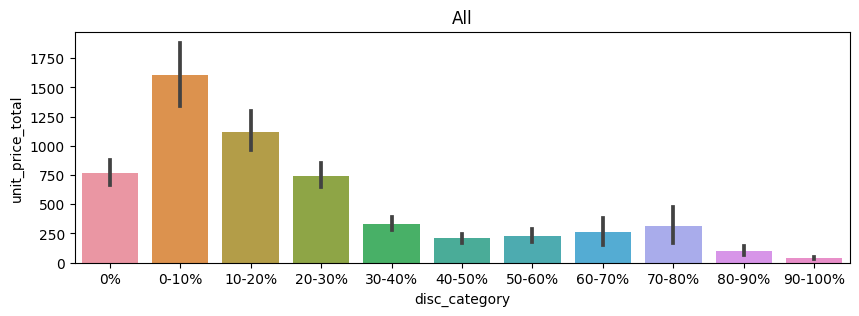

In [ ]:
per_product = (
    discounts.groupby(["sku", "disc_category"], as_index=False)
    .agg({"product_quantity":"sum", "unit_price_total":"sum", "category":"first", "price category":"first"})
)


# All products
data = per_product.sort_values(by="disc_category")
fig, ax = plt.subplots(1,1,figsize=(10,3))
sns.barplot(
        data=data,
        x="disc_category",
        y="unit_price_total", 
        estimator="mean")
plt.title("All")



#sns.set(rc={"axes.edgecolor":"#283250", "grid.color":"#283250",'axes.facecolor':'#283250', 'figure.facecolor':'#283250'})

#data = per_product.sort_values(by="disc_category")
#fig, ax = plt.subplots(1,1,figsize=(10,3))

# Cambia il colore delle etichette sull'asse x e y
#ax = plt.gca()
#ax.set_xticklabels(ax.get_xticklabels(), color='white')
#ax.set_yticklabels(ax.get_yticklabels(), color='white')

#Remove bar errors
#ax.set_ci(None)

#sns.barplot(
#        data=data,
#        x="disc_category",
#        y="unit_price_total", 
#        estimator="mean",
#        palette=["#C32030","#F54034","#F54034","#F54034","#CED9DB","#CED9DB","#CED9DB","#CED9DB","#CED9DB","#CED9DB","#CED9DB"],
#        edgecolor="none", ci=None
#)

#plt.title("All")


### Average discounts vs. Sales over time (Pia)
#### All Products

The correlation between average discount and No. of sales is r = 0.26



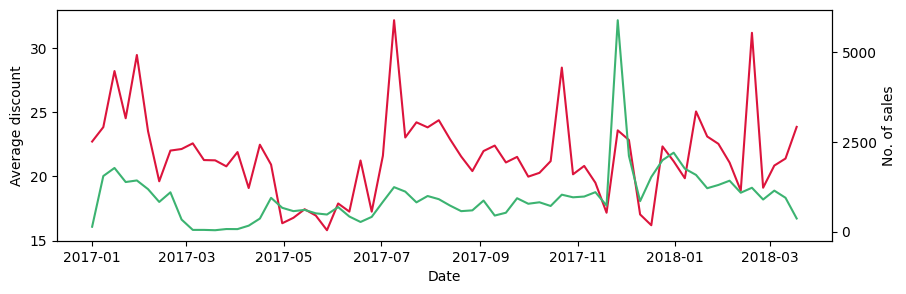

In [ ]:

data = discounts.loc[discounts.discount_rel >= 0,:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([15,20,25,30])
ax2.set_yticks([0,2500,5000])

#### Apple products

The correlation between average discount and No. of sales is r = 0.01



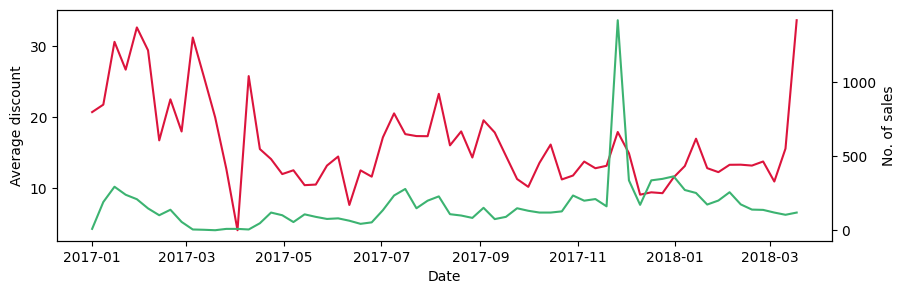

In [ ]:
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.brand == "APP"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([10,20,30])
ax2.set_yticks([0,500,1000])

#### Non-Apple products

The correlation between average discount and No. of sales is r = 0.34



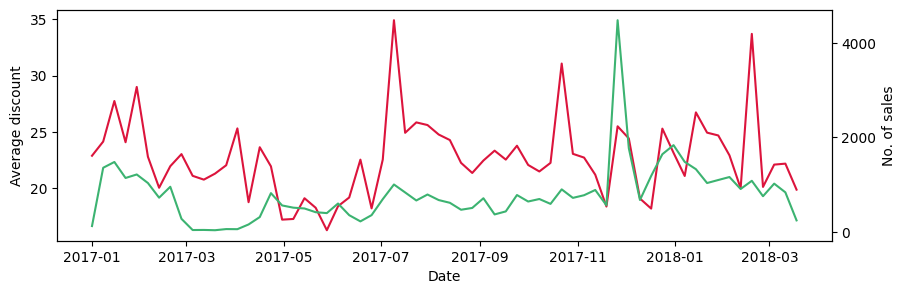

In [ ]:
data = discounts.loc[(discounts.discount_rel >= 0) & ~(discounts.brand == "APP"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([20,25,30,35])
ax2.set_yticks([0,2000,4000])

#### iPhones

The correlation between average discount and No. of sales is r = 0.22



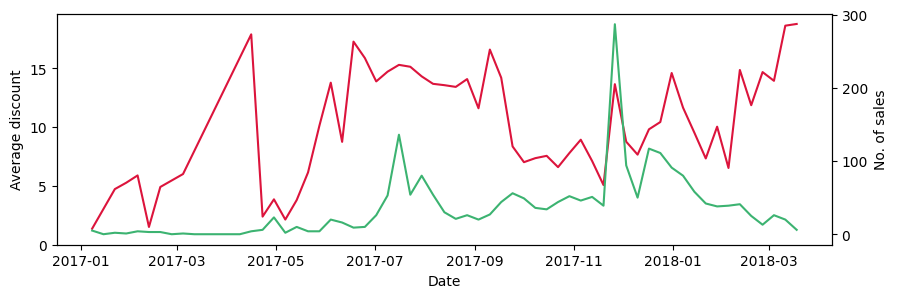

In [ ]:
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.category == "iPhones"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([0,5,10,15])
ax2.set_yticks([0,100,200,300])

#### Hard drives

The correlation between average discount and No. of sales is r = 0.48



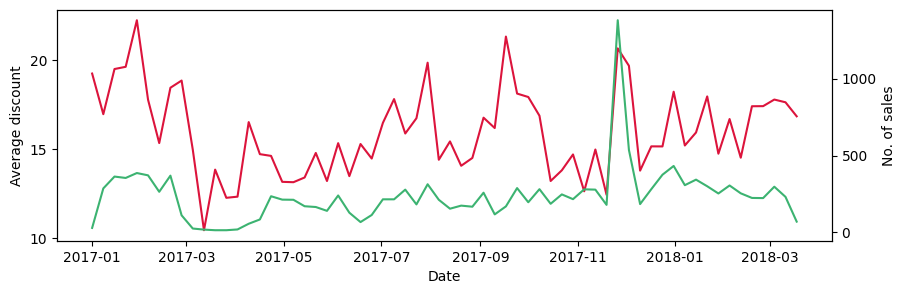

In [ ]:
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.category == "Hard drives"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([10,15,20])
ax2.set_yticks([0,500,1000])

#### Accessories

The correlation between average discount and No. of sales is r = 0.4



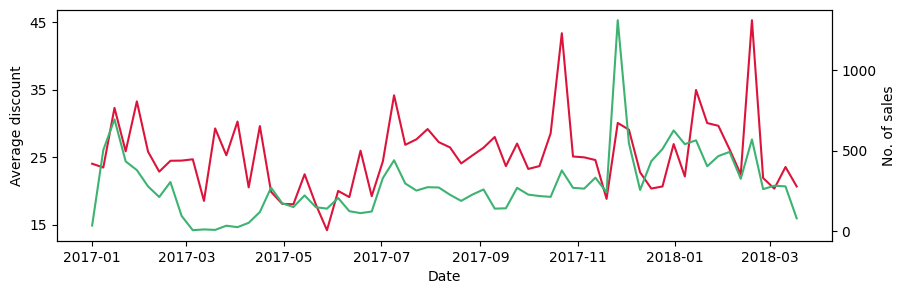

In [ ]:
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.category == "Accessories"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"The correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([15,25,35,45])
ax2.set_yticks([0,500,1000])

### Same plots for apple products and non-Apple accessories but with markers added (looks nicer I think)

For Apple products, the correlation between average discount and No. of sales is r = 0.01

For Accessories, the correlation between average discount and No. of sales is r = 0.43



[Text(0.5, 1.0, 'Accessories')]

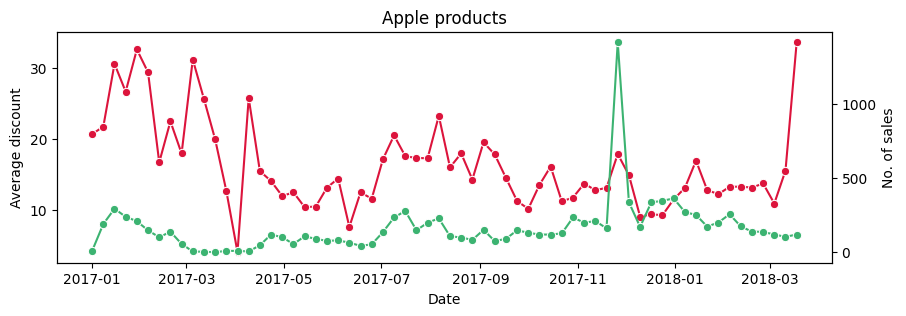

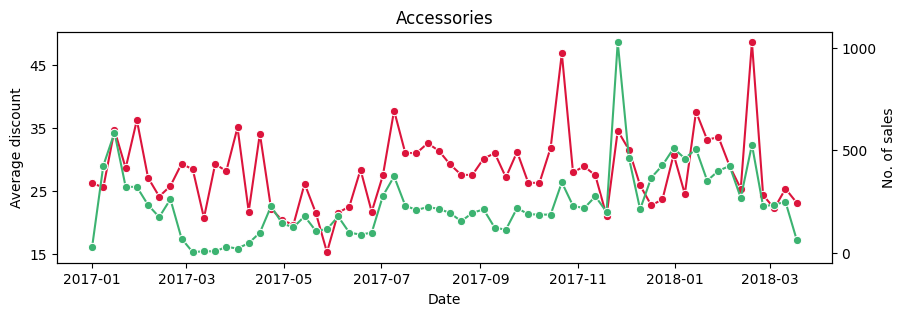

In [ ]:
## Apple products
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.brand == "APP"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"For Apple products, the correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson', marker='o')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', marker='o', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([10,20,30])
ax2.set_yticks([0,500,1000])
ax2.set(title="Apple products")


## Non-Apple Accessories
data = discounts.loc[(discounts.discount_rel >= 0) & (discounts.category == "Accessories") & (discounts.brand != "APP"),:].resample("W", on="date").agg({"discount_rel":"mean", "product_quantity":"sum", "unit_price_total":"sum"}).reset_index()

cor = data["discount_rel"].corr(data["product_quantity"])
print(f"For Accessories, the correlation between average discount and No. of sales is r = {round(cor,2)}\n")

fig, ax1 = plt.subplots(figsize=(10,3))
ax1 = sns.lineplot(data=data, x="date", y="discount_rel", color='crimson', marker='o')
ax2 = ax1.twinx()
sns.lineplot(data=data, x="date", y="product_quantity", color='mediumseagreen', marker='o', ax=ax2)
ax1.set(xlabel="Date", ylabel="Average discount")
ax2.set(xlabel="Date", ylabel="No. of sales")
ax1.set_yticks([15,25,35,45])
ax2.set_yticks([0,500,1000])
ax2.set(title="Accessories")


